<a href="https://colab.research.google.com/github/Pratyushk2003/healthcare/blob/main/natwet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('/content/HealthApp_2k.log_structured.csv')

In [4]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


<ipython-input-6-5a68a35124f4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps_data['Steps'] = steps_data['Content'].str.extract(r'onExtend:\d+ (\d+)').astype(float)


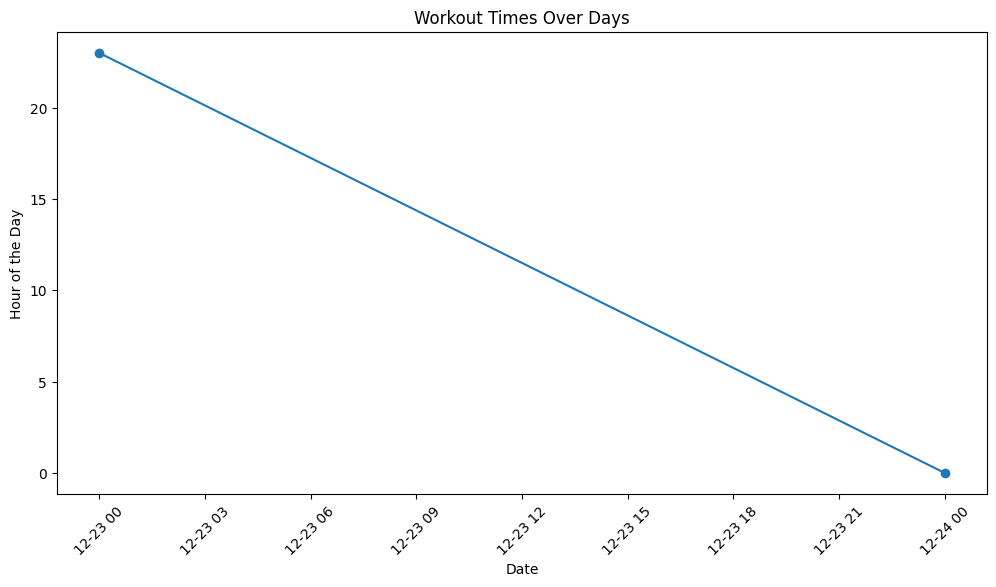

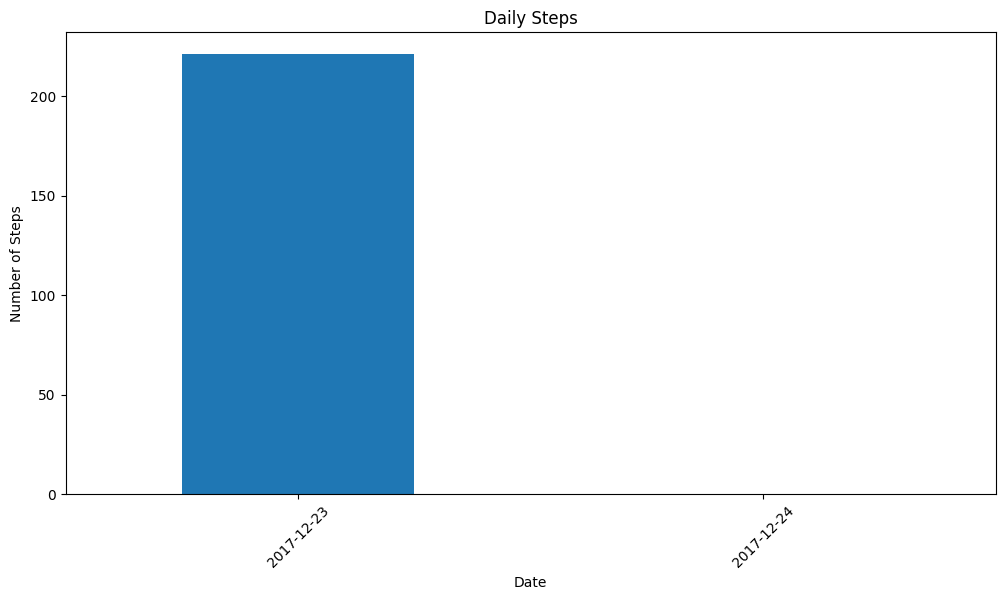

In [6]:

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Extract date and time components
df['Date'] = df['Time'].dt.date
df['Hour'] = df['Time'].dt.hour

# Analyze workout time (assuming 'onStandStepChanged' event indicates workout)
workout_events = df[df['Content'].str.contains('onStandStepChanged')]
workout_times = workout_events.groupby('Date')['Hour'].max()

# Analyze steps on a daily basis
steps_data = df[df['Component'] == 'Step_LSC']
steps_data['Steps'] = steps_data['Content'].str.extract(r'onExtend:\d+ (\d+)').astype(float)
daily_steps = steps_data.groupby('Date')['Steps'].sum()

# Visualize workout times
plt.figure(figsize=(12, 6))
plt.plot(workout_times.index, workout_times.values, marker='o')
plt.title('Workout Times Over Days')
plt.xlabel('Date')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.show()

# Visualize daily steps
plt.figure(figsize=(12, 6))
daily_steps.plot(kind='bar')
plt.title('Daily Steps')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.show()

To get spacy version run
spacy.__version__

To get the Gpu
!nvidia-smi

In [ ]:
spacy.__version__

'3.6.1'

In [ ]:
!nvidia-smi

Thu Aug 24 12:21:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! git clone https://github.com/Pratyushk2003/Resume-parsing.git

Cloning into 'Resume-parsing'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 263.18 KiB | 4.87 MiB/s, done.


In [ ]:
cv_data = json.load(open('/content/Resume-parsing/data/training/train_data.json','r'))

In [ ]:
len(cv_data)

200

In [ ]:
!python -m spacy init fill-config /content/Resume-parsing/data/training/base_config.cfg /content/Resume-parsing/data/training/config.cfg

2023-08-24 12:23:15.206831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
/content/Resume-parsing/data/training/config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
cv_data

In [ ]:
def get_spacy_dco(file, data)


In [ ]:

model.predict_proba(x_train)